# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.manifold import TSNE
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [181]:
df = pd.read_csv(r'https://raw.githubusercontent.com/Jirrooo/beverage-sales-clustering-and-classification/refs/heads/main/Dataset_inisiasi.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation


In [182]:
df.select_dtypes(include="number").columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

In [183]:
df.select_dtypes(include="object").columns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object')

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## Memahami Struktur Data

In [184]:
df.shape

(2111, 16)

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [186]:
df.describe(include='all')

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
count,2111,2111.000000,2111.000000,2111.000000,2111,2111,2111.000000,2111.000000,2111,2111,2111.000000,2111,2111.000000,2111.000000,2111,2111
unique,2,NaN,NaN,NaN,2,2,NaN,NaN,4,2,NaN,2,NaN,NaN,4,5
top,Male,NaN,NaN,NaN,yes,yes,NaN,NaN,Sometimes,no,NaN,no,NaN,NaN,Sometimes,Public_Transportation
freq,1068,NaN,NaN,NaN,1726,1866,NaN,NaN,1765,2067,NaN,2015,NaN,NaN,1401,1580
mean,NaN,24.315964,1.701620,86.586035,NaN,NaN,2.418986,2.685651,NaN,NaN,2.008053,NaN,1.010313,0.657861,NaN,NaN
std,NaN,6.357078,0.093368,26.191163,NaN,NaN,0.533996,0.778079,NaN,NaN,0.612950,NaN,0.850613,0.608926,NaN,NaN
min,NaN,14.000000,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN
25%,NaN,20.000000,1.630000,65.470000,NaN,NaN,2.000000,2.660000,NaN,NaN,1.585000,NaN,0.125000,0.000000,NaN,NaN
50%,NaN,23.000000,1.700000,83.000000,NaN,NaN,2.390000,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.625000,NaN,NaN
75%,NaN,26.000000,1.770000,107.430000,NaN,NaN,3.000000,3.000000,NaN,NaN,2.480000,NaN,1.670000,1.000000,NaN,NaN


**Insight:**
- Dataset memiliki 16 kolom dan 2111 baris

## Menangani Data yang Hilang

In [187]:
print(f"Jumlah data yang hilang: \n{df.isna().sum()}")

Jumlah data yang hilang: 
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64


In [188]:
print(f"Jumlah data yang ganda: \n{df.duplicated().sum()}")

Jumlah data yang ganda: 
24


**Insight:**
- Tidak ada data yang hilang
- Ada 24 data yang ganda

## Analisis Distribusi dan Korelasi

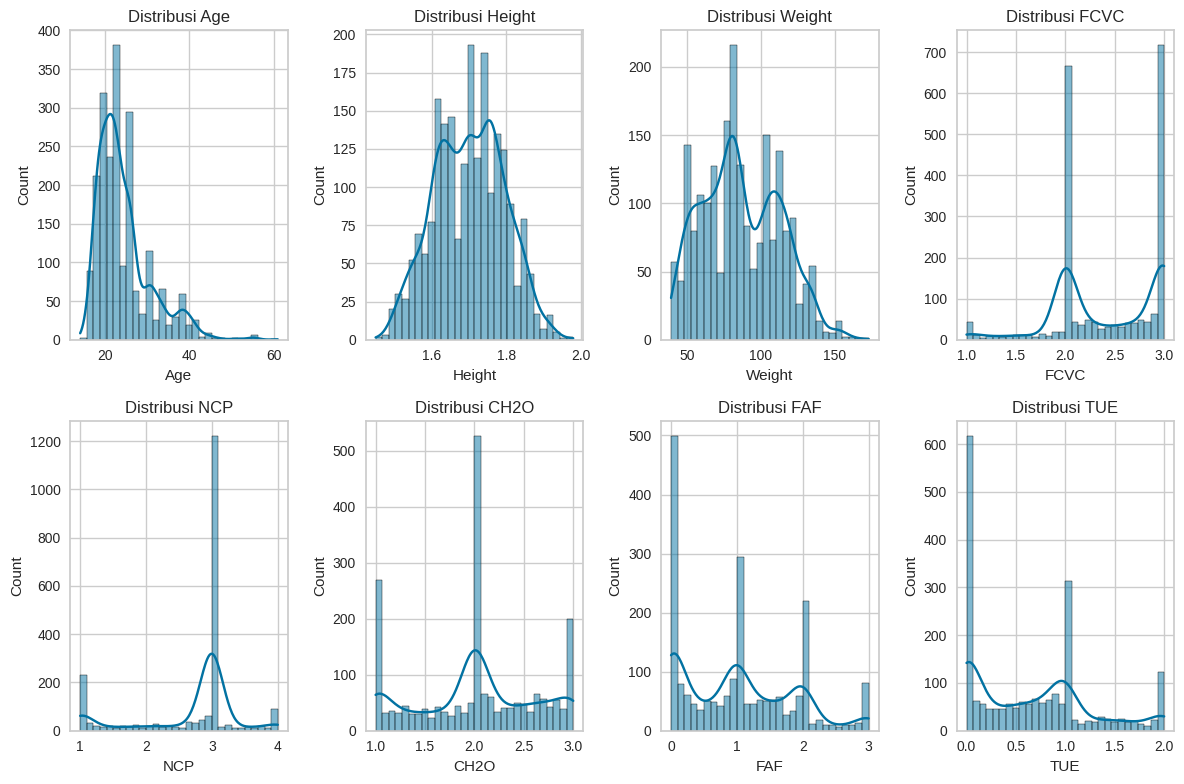

In [189]:
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
plt.figure(figsize=(12, 8))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 4, i)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribusi {feature}')

plt.tight_layout()
plt.show()

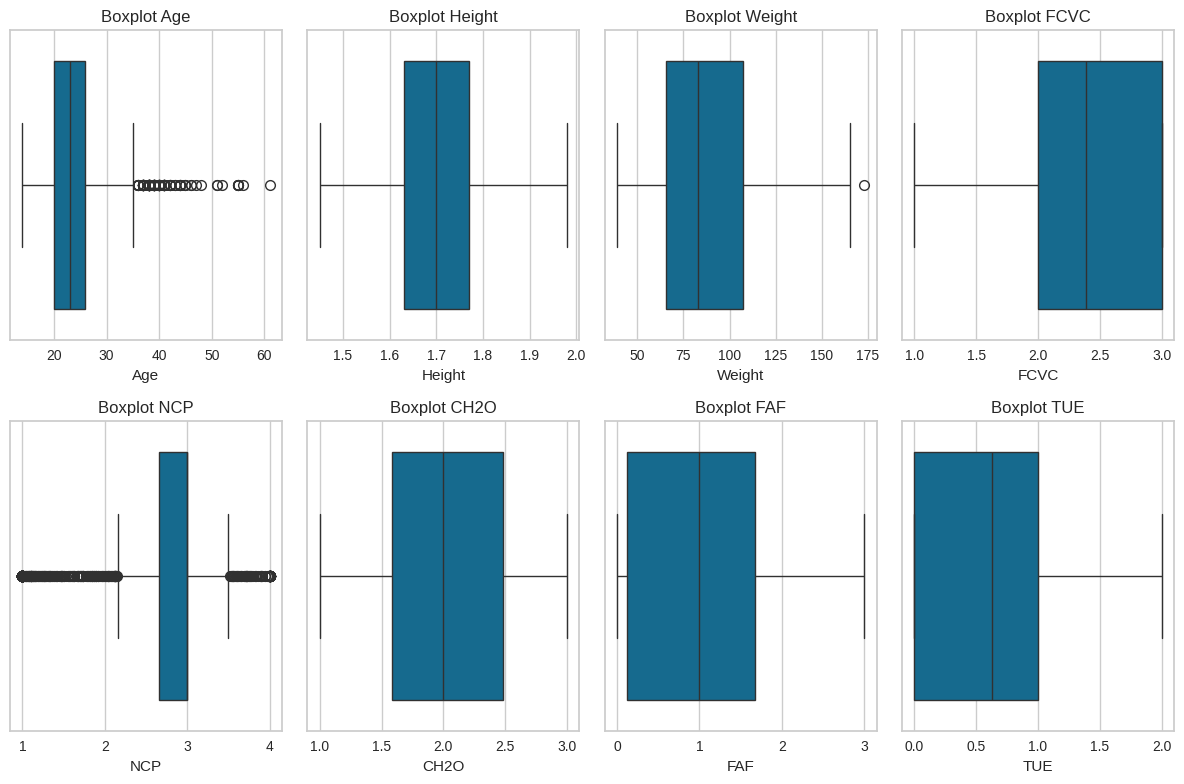

In [190]:
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
plt.figure(figsize=(12, 8))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot {feature}')

plt.tight_layout()
plt.show()

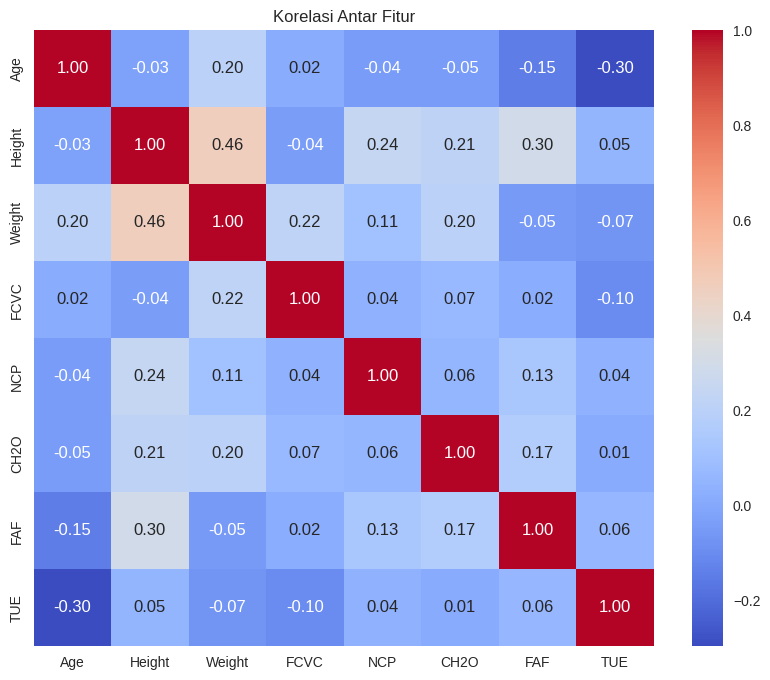

In [191]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include="number").corr(), cmap="coolwarm" , annot=True, fmt=".2f")
plt.title("Korelasi Antar Fitur")
plt.show()

## Visualisasi Data

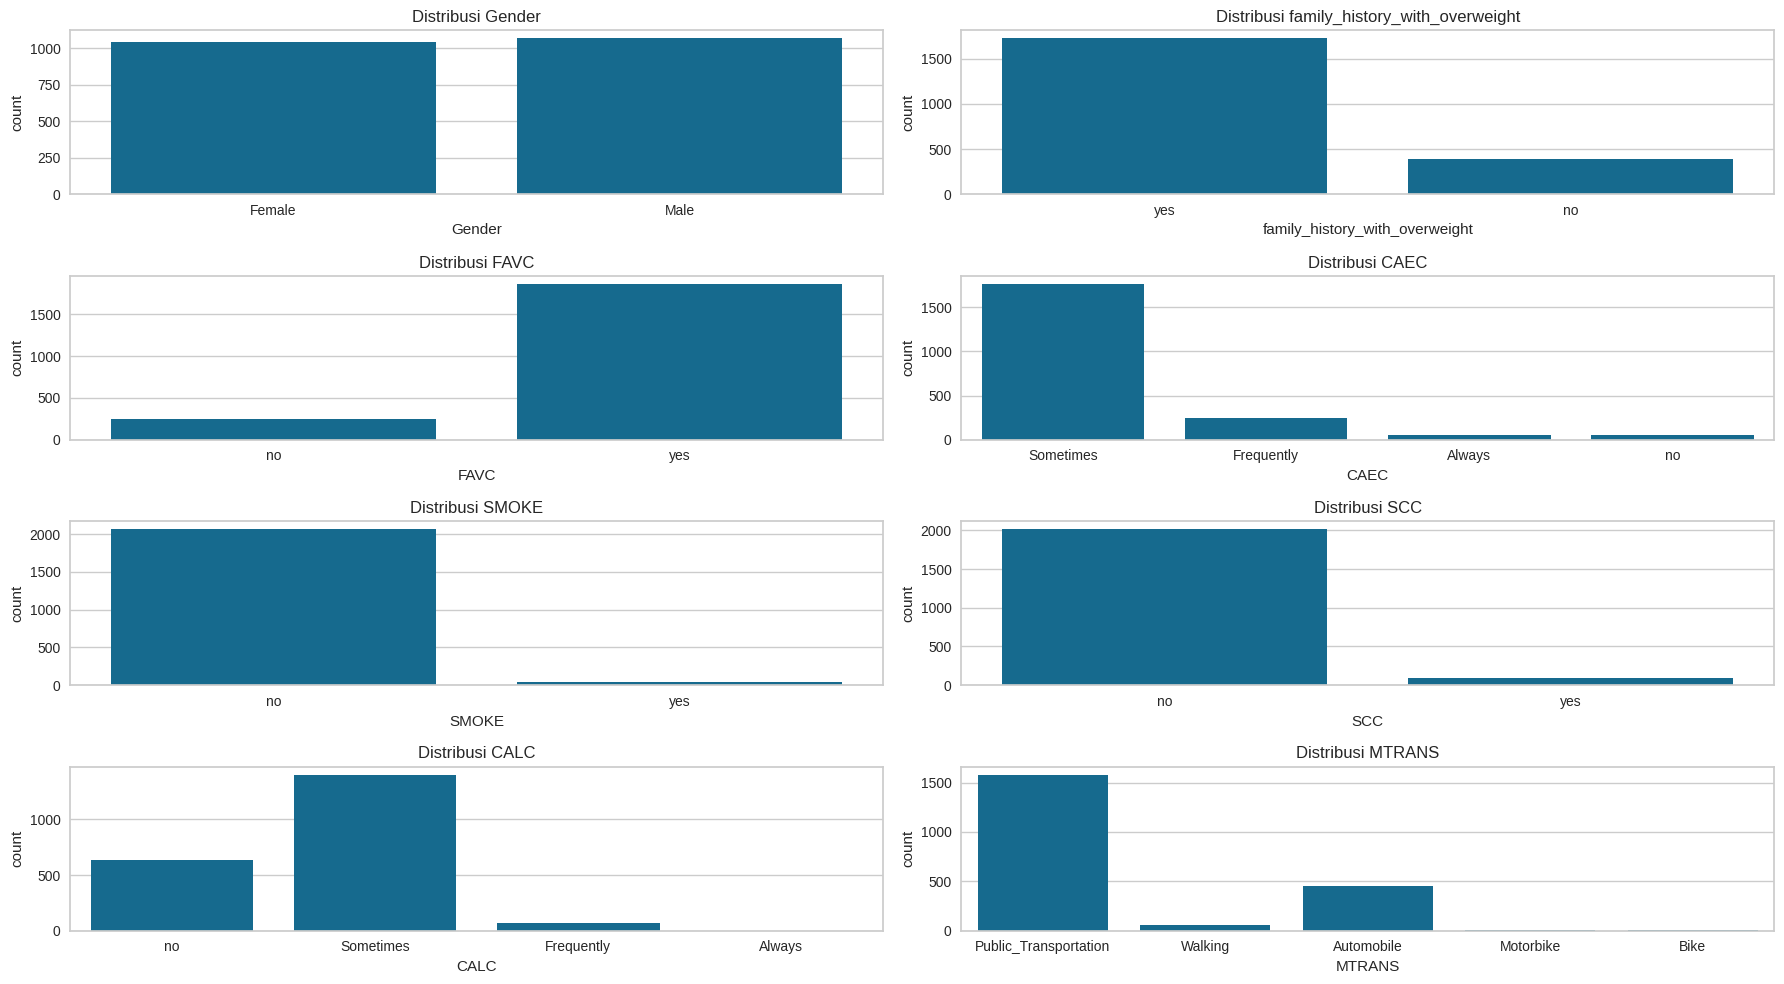

In [192]:
categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
plt.figure(figsize=(18, 10))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 2, i)
    sns.countplot(x=df[feature])
    plt.title(f'Distribusi {feature}')

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

## Menghapus Data Duplikat

In [193]:
df.drop_duplicates(inplace=True)
print(f"Jumlah data yang ganda: \n{df.duplicated().sum()}")

Jumlah data yang ganda: 
0


## Normalisasi atau Standarisasi Fitur

In [194]:
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
df_normalized = df.copy()
scaler = MinMaxScaler()
df_normalized[numerical_features[1:]] = scaler.fit_transform(df_normalized[numerical_features[1:]])
df_normalized.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21,0.320755,0.186567,yes,no,0.5,0.666667,Sometimes,no,0.5,no,0.000000,0.5,no,Public_Transportation
1,Female,21,0.132075,0.126866,yes,no,1.0,0.666667,Sometimes,yes,1.0,yes,1.000000,0.0,Sometimes,Public_Transportation
2,Male,23,0.660377,0.283582,yes,no,0.5,0.666667,Sometimes,no,0.5,no,0.666667,0.5,Frequently,Public_Transportation
3,Male,27,0.660377,0.358209,no,no,1.0,0.666667,Sometimes,no,0.5,no,0.666667,0.0,Frequently,Walking
4,Male,22,0.622642,0.379104,no,no,0.5,0.000000,Sometimes,no,0.5,no,0.000000,0.0,Sometimes,Public_Transportation


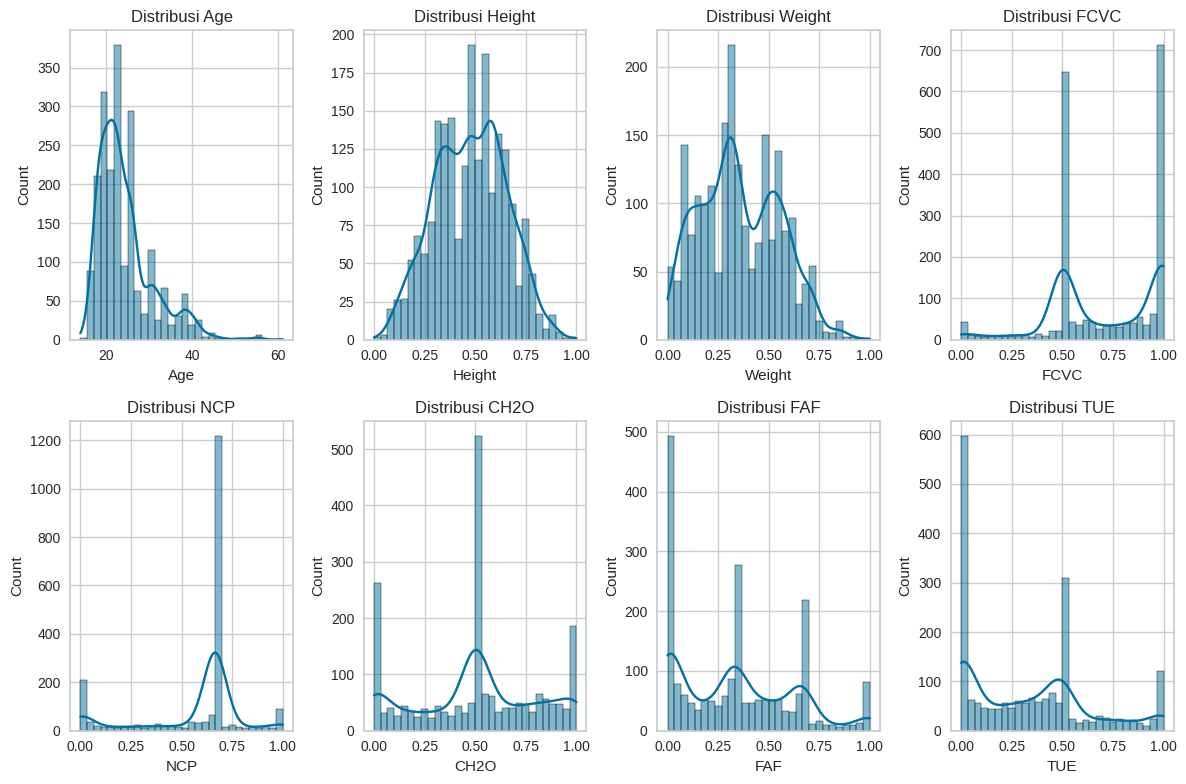

In [195]:
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
plt.figure(figsize=(12, 8))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 4, i)
    sns.histplot(df_normalized[feature], bins=30, kde=True)
    plt.title(f'Distribusi {feature}')

plt.tight_layout()
plt.show()

## Deteksi dan Penanganan Outlier

In [196]:
df_fixed = df_normalized.copy()

numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

Q1 = df_fixed[numerical_features].quantile(0.25)
Q3 = df_fixed[numerical_features].quantile(0.75)
IQR = Q3 - Q1

minimum = Q1 - 1.5 * IQR
maximum = Q3 + 1.5 * IQR

for col in numerical_features:
    df_fixed[col] = df_fixed[col].mask(df_fixed[col] < minimum[col], minimum[col])
    df_fixed[col] = df_fixed[col].mask(df_fixed[col] > maximum[col], maximum[col])

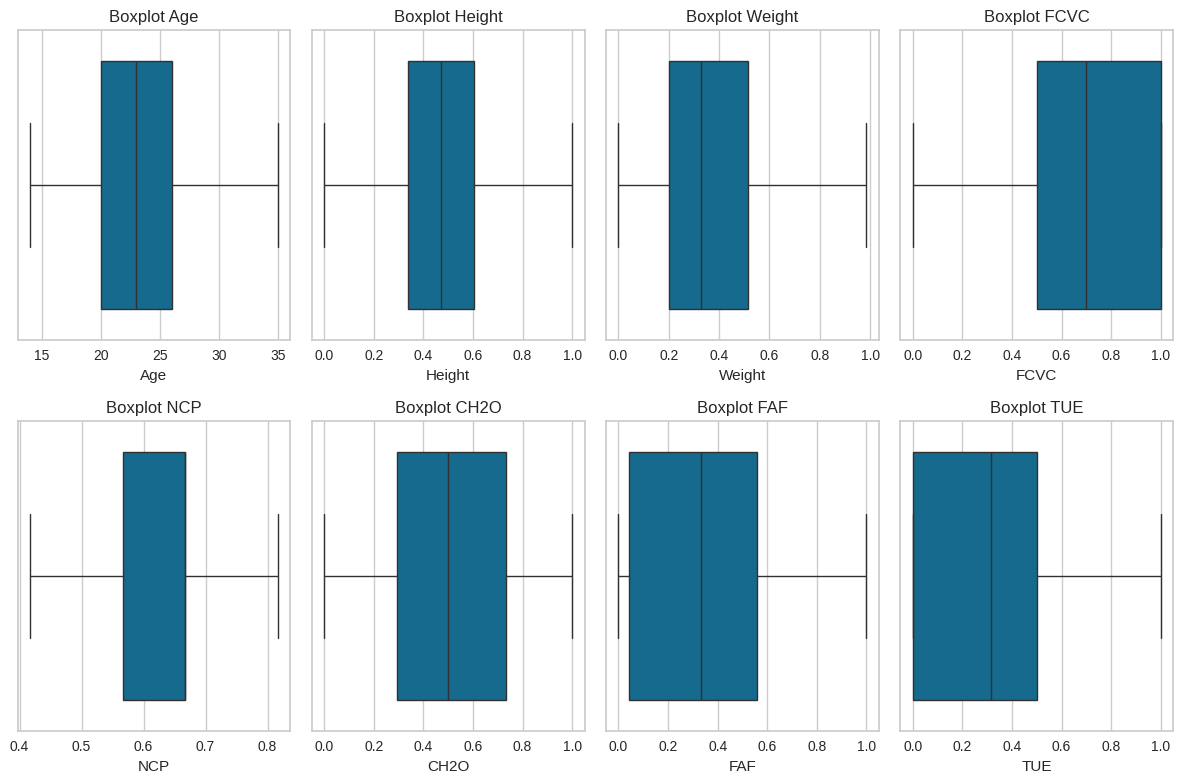

In [197]:
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
plt.figure(figsize=(12, 8))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=df_fixed[feature])
    plt.title(f'Boxplot {feature}')

plt.tight_layout()
plt.show()

Insight:
- Outlier sudah tidak ada

## Encoding Data Kategorikal

In [198]:
df_encoded = df_fixed.copy()

ordinal_features = ['CAEC', 'CALC']
ordinal_mapping = [['no', 'Sometimes', 'Frequently', 'Always']] * len(ordinal_features)
oe = OrdinalEncoder(categories=ordinal_mapping)
df_encoded[ordinal_features] = oe.fit_transform(df_encoded[ordinal_features])

nominal_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'MTRANS']

ohe = OneHotEncoder(drop='first', sparse_output=False)

encoded_ohe = ohe.fit_transform(df_encoded[nominal_features])

ohe_df = pd.DataFrame(encoded_ohe, columns=ohe.get_feature_names_out(nominal_features), index=df_encoded.index)

df_encoded = pd.concat([df_encoded.drop(columns=nominal_features), ohe_df], axis=1)

In [199]:
df_encoded.head()

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,Gender_Male,family_history_with_overweight_yes,FAVC_yes,SMOKE_yes,SCC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21,0.320755,0.186567,0.5,0.666667,1.0,0.5,0.000000,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,21,0.132075,0.126866,1.0,0.666667,1.0,1.0,1.000000,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,23,0.660377,0.283582,0.5,0.666667,1.0,0.5,0.666667,0.5,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,27,0.660377,0.358209,1.0,0.666667,1.0,0.5,0.666667,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,22,0.622642,0.379104,0.5,0.416667,1.0,0.5,0.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [200]:
k_range = range(2, 11)
scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_encoded)
    score = silhouette_score(df_encoded, cluster_labels)
    scores.append(score)

print(f"Silhouette Score maksimal: {max(scores)}")
print(f"Jumlah kluster optimal (manual): {k_range[scores.index(max(scores))]}")

Silhouette Score maksimal: 0.6125533551075756
Jumlah kluster optimal (manual): 2


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

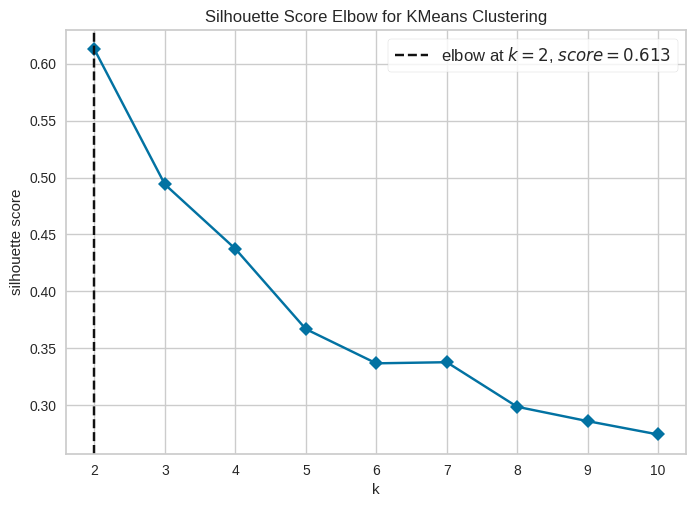

Jumlah kluster optimal (KElbow): 2


In [201]:
# KElbowVisualizer
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 11), metric='silhouette', timings=False)
visualizer.fit(df_encoded)
visualizer.show()

optimal_k = visualizer.elbow_value_
print(f"Jumlah kluster optimal (KElbow): {optimal_k}")

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [202]:
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(df_encoded)
df_encoded["Cluster"] = clusters

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


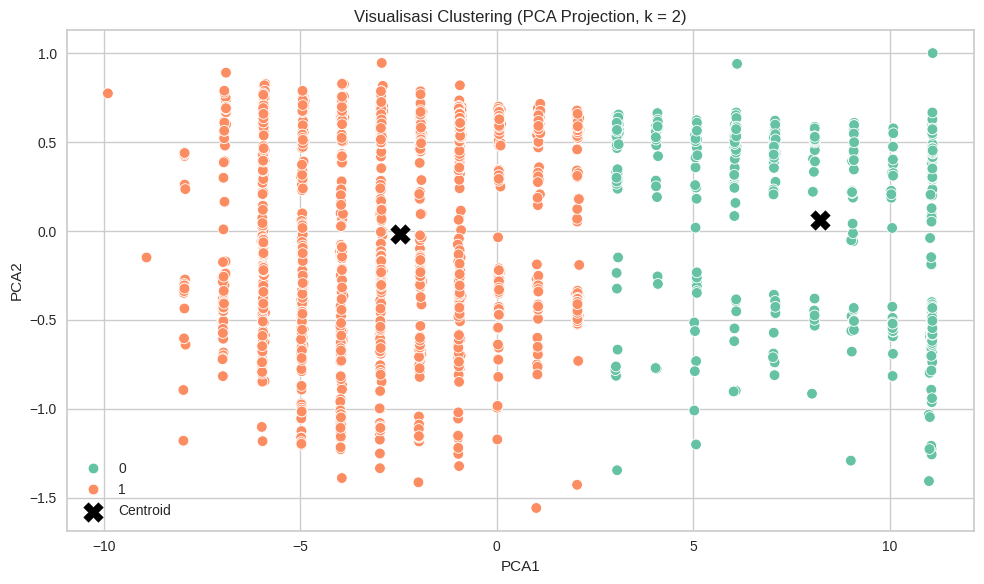

In [203]:
df_encoded_for_pca = df_encoded.drop(columns=["Cluster"])

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_encoded_for_pca)

df_pca = pd.DataFrame(pca_result, columns=["PCA1", "PCA2"])
df_pca["Cluster"] = clusters

centroids_2d = pca.transform(kmeans_final.cluster_centers_)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=60)
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], s=200, c='black', marker='X', label='Centroid')
plt.title(f'Visualisasi Clustering (PCA Projection, k = {optimal_k})')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


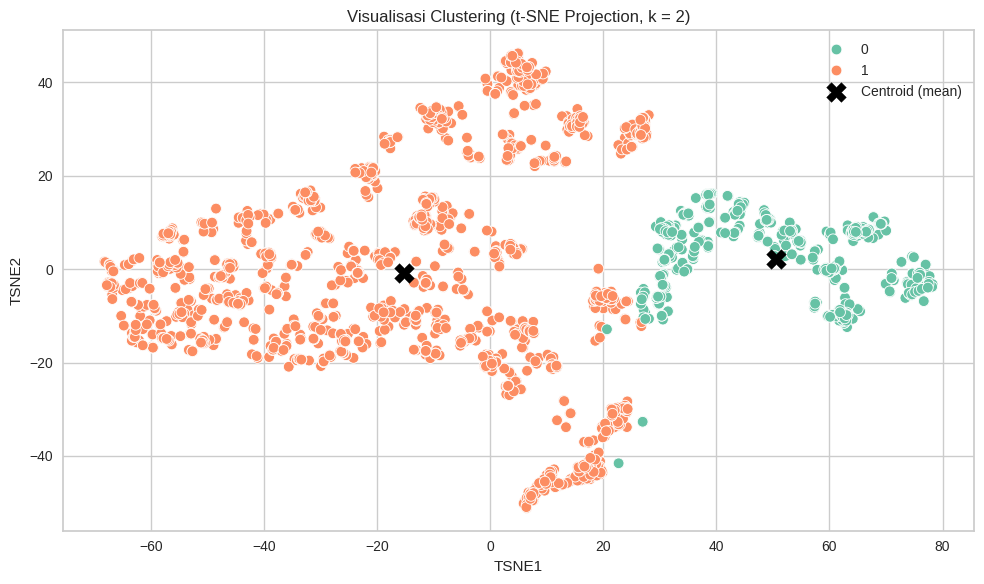

In [204]:
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
tsne_result = tsne.fit_transform(df_encoded.drop(columns=["Cluster"]))

df_tsne = pd.DataFrame(tsne_result, columns=["TSNE1", "TSNE2"])
df_tsne["Cluster"] = clusters

centroids_tsne = df_tsne.groupby("Cluster")[["TSNE1", "TSNE2"]].mean().values

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_tsne, x="TSNE1", y="TSNE2", hue="Cluster", palette="Set2", s=60)
plt.scatter(centroids_tsne[:, 0], centroids_tsne[:, 1], s=200, c="black", marker="X", label="Centroid (mean)")
plt.title(f"Visualisasi Clustering (t-SNE Projection, k = {optimal_k})")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [205]:
df_normalized['Cluster'] = df_tsne['Cluster']
df_normalized.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Cluster
0,Female,21,0.320755,0.186567,yes,no,0.5,0.666667,Sometimes,no,0.5,no,0.000000,0.5,no,Public_Transportation,1.0
1,Female,21,0.132075,0.126866,yes,no,1.0,0.666667,Sometimes,yes,1.0,yes,1.000000,0.0,Sometimes,Public_Transportation,1.0
2,Male,23,0.660377,0.283582,yes,no,0.5,0.666667,Sometimes,no,0.5,no,0.666667,0.5,Frequently,Public_Transportation,1.0
3,Male,27,0.660377,0.358209,no,no,1.0,0.666667,Sometimes,no,0.5,no,0.666667,0.0,Frequently,Walking,0.0
4,Male,22,0.622642,0.379104,no,no,0.5,0.000000,Sometimes,no,0.5,no,0.000000,0.0,Sometimes,Public_Transportation,1.0


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [206]:
df_normalized[numerical_features[1:]] = scaler.inverse_transform(df_normalized[numerical_features[1:]])
df_normalized.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Cluster
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,1.0
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,1.0
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,1.0
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,0.0
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,1.0


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [207]:
print("Jumlah data per cluster:")
print(df_normalized['Cluster'].value_counts())

numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
print("\nRata-rata fitur numerik per cluster:")
print(df_normalized.groupby('Cluster')[numerical_features].mean().round(2))

categorical_features = [
    'Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
    'SCC', 'CALC', 'MTRANS'
]

for col in categorical_features:
    print(f"\nDistribusi {col} per cluster:")
    print(df_normalized.groupby('Cluster')[col].value_counts(normalize=True).unstack().round(2))


Jumlah data per cluster:
Cluster
1.0    1583
0.0     480
Name: count, dtype: int64

Rata-rata fitur numerik per cluster:
           Age  Height  Weight  FCVC   NCP  CH2O   FAF   TUE
Cluster                                                     
0.0      26.17    1.72   91.59  2.30  2.61  1.99  1.03  0.60
1.0      23.80    1.70   84.97  2.45  2.72  2.00  1.02  0.68

Distribusi Gender per cluster:
Gender   Female  Male
Cluster              
0.0        0.32  0.68
1.0        0.54  0.46

Distribusi family_history_with_overweight per cluster:
family_history_with_overweight    no   yes
Cluster                                   
0.0                             0.12  0.88
1.0                             0.19  0.81

Distribusi FAVC per cluster:
FAVC       no   yes
Cluster            
0.0      0.10  0.90
1.0      0.12  0.88

Distribusi CAEC per cluster:
CAEC     Always  Frequently  Sometimes    no
Cluster                                     
0.0        0.01        0.05       0.91  0.03
1.0        0

In [208]:
import pandas as pd
import math

summary = df_normalized.groupby("Cluster").agg({
    "Gender": lambda x: x.mode()[0],
    "family_history_with_overweight": lambda x: x.mode()[0],
    "Age": ["mean", "max", "min"],
    "Height": ["mean", "max", "min"],
    "Weight": ["mean", "max", "min"],
    "FCVC": ["mean", "max", "min"],
    "NCP": ["mean", "max", "min"],
    "CH2O": ["mean", "max", "min"],
    "FAF": ["mean", "max", "min"],
    "TUE": ["mean", "max", "min"]
}).reset_index()

summary.columns = ["_".join(col).replace("_<lambda>", "").rstrip("_") if isinstance(col, tuple) else col for col in summary.columns]

for _, row in summary.iterrows():
    print(f"""
{"Cluster".ljust(35)}: {row["Cluster"]}
{"Dominan Gender".ljust(35)}: {row["Gender"]}
{"Riwayat Keluarga Overweight".ljust(35)}: {row["family_history_with_overweight"]}

{"Rata-rata Umur".ljust(35)}: {round(row["Age_mean"], 2)} tahun
{"Rata-rata Tinggi Badan".ljust(35)}: {round(row["Height_mean"], 2)} cm
{"Rata-rata Berat Badan".ljust(35)}: {round(row["Weight_mean"], 2)} kg
{"Rata-rata Konsumsi Sayur (FCVC)".ljust(35)}: {round(row["FCVC_mean"], 2)} (0-3)
{"Rata-rata Frekuensi Makan (NCP)".ljust(35)}: {round(row["NCP_mean"], 2)} kali/hari
{"Rata-rata Konsumsi Air (CH2O)".ljust(35)}: {round(row["CH2O_mean"], 2)} liter/hari
{"Rata-rata Aktivitas Fisik (FAF)".ljust(35)}: {round(row["FAF_mean"], 2)} jam/minggu
{"Rata-rata Waktu Layar (TUE)".ljust(35)}: {round(row["TUE_mean"], 2)} jam/hari
""")



Cluster                            : 0.0
Dominan Gender                     : Male
Riwayat Keluarga Overweight        : yes

Rata-rata Umur                     : 26.17 tahun
Rata-rata Tinggi Badan             : 1.72 cm
Rata-rata Berat Badan              : 91.59 kg
Rata-rata Konsumsi Sayur (FCVC)    : 2.3 (0-3)
Rata-rata Frekuensi Makan (NCP)    : 2.61 kali/hari
Rata-rata Konsumsi Air (CH2O)      : 1.99 liter/hari
Rata-rata Aktivitas Fisik (FAF)    : 1.03 jam/minggu
Rata-rata Waktu Layar (TUE)        : 0.6 jam/hari


Cluster                            : 1.0
Dominan Gender                     : Female
Riwayat Keluarga Overweight        : yes

Rata-rata Umur                     : 23.8 tahun
Rata-rata Tinggi Badan             : 1.7 cm
Rata-rata Berat Badan              : 84.97 kg
Rata-rata Konsumsi Sayur (FCVC)    : 2.45 (0-3)
Rata-rata Frekuensi Makan (NCP)    : 2.72 kali/hari
Rata-rata Konsumsi Air (CH2O)      : 2.0 liter/hari
Rata-rata Aktivitas Fisik (FAF)    : 1.02 jam/minggu
Rata-ra

## **Hasil Analisis**:

### Cluster 0
- Dominan Jenis Kelamin: Laki-laki
- Riwayat Keluarga Overweight: Iya
- Rata-rata Umur                     : 26.17 tahun
- Rata-rata Tinggi Badan             : 1.72 cm
- Rata-rata Berat Badan              : 91.59 kg
- Rata-rata Konsumsi Sayur (FCVC)    : 2.3 (0-3)
- Rata-rata Frekuensi Makan (NCP)    : 2.61 kali/hari
- Rata-rata Konsumsi Air (CH2O)      : 1.99 liter/hari
- Rata-rata Aktivitas Fisik (FAF)    : 1.03 jam/minggu
- Rata-rata Waktu Layar (TUE)        : 0.6 jam/hari
- Analisis: Cluster 0 didominasi oleh individu berjenis kelamin laki-laki yang memiliki riwayat keluarga dengan kelebihan berat badan. Kelompok ini memiliki rata-rata umur 26.17 tahun dengan tinggi badan sekitar 1.72 meter dan berat badan rata-rata mencapai 91.59 kg, yang menunjukkan kecenderungan ke arah obesitas atau overweight. Konsumsi sayur (FCVC) cukup baik dengan rata-rata 2.3 (dalam skala 0–3), dan frekuensi makan harian (NCP) sebesar 2.61 kali per hari. Konsumsi air harian mencapai 1.99 liter. Namun, aktivitas fisik mingguan (FAF) sangat rendah, hanya 1.03 jam per minggu, dan waktu yang dihabiskan untuk aktivitas sedentari seperti layar (TUE) adalah 0.6 jam per hari. Dengan kriteria tersebut, individu dalam cluster ini dapat dikategorikan sebagai overweight, kemungkinan besar disebabkan oleh kurangnya aktivitas fisik yang seimbang dengan pola konsumsi mereka.

### Cluster 1
- Dominan Jenis Kelamin: Perempuan
- Riwayat Keluarga Overweight: Iya
- Rata-rata Umur                     : 23.8 tahun
- Rata-rata Tinggi Badan             : 1.7 cm
- Rata-rata Berat Badan              : 84.97 kg
- Rata-rata Konsumsi Sayur (FCVC)    : 2.45 (0-3)
- Rata-rata Frekuensi Makan (NCP)    : 2.72 kali/hari
- Rata-rata Konsumsi Air (CH2O)      : 2.0 liter/hari
- Rata-rata Aktivitas Fisik (FAF)    : 1.02 jam/minggu
- Rata-rata Waktu Layar (TUE)        : 0.68 jam/hari
- Analisis: Cluster 1 didominasi oleh individu perempuan, juga dengan riwayat keluarga overweight. Rata-rata usia kelompok ini lebih muda, yaitu 23.8 tahun, dengan tinggi badan rata-rata 1.70 meter dan berat badan 84.97 kg. Konsumsi sayur sedikit lebih tinggi dibanding Cluster 0, yakni 2.45, dengan frekuensi makan 2.72 kali per hari dan konsumsi air sekitar 2.0 liter per hari. Aktivitas fisik mingguan tercatat hampir sama dengan Cluster 0, yaitu 1.02 jam per minggu, tetapi waktu layar sedikit lebih tinggi, yaitu 0.68 jam per hari. Meskipun demikian, berdasarkan tinggi dan berat badannya, kelompok ini tidak masuk ke dalam kategori overweight. Hal ini menunjukkan bahwa meskipun aktivitas fisik rendah, pengendalian asupan makanan dan kebiasaan sehat lainnya mungkin berperan dalam menjaga berat badan pada individu di cluster ini.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [209]:
df_normalized.to_csv("Dataset_clustering.csv", index=False)